In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from flamingchoripan.files import get_roodirs

rootdir = '../save'
kf = '.'
mode = 'fine-tuning'
method = 'spm-mcmc-estw'

cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
roodirs = get_roodirs(rootdir)
model_names = [r.split('/')[-1] for r in roodirs if '~' in r] # patch
model_names

['mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~b=516~rsc=0~bypass=0',
 'mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~cell=GRU~b=516~rsc=0~bypass=0',
 'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=32-32-32~dec-emb=32-32-32~b=516~rsc=0~bypass=0',
 'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=32-32-32~dec-emb=32-32-32~b=516~rsc=0~bypass=0',
 'mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~cell=LSTM~b=516~rsc=0~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~b=516~rsc=0~bypass=0',
 'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=32-32-32~dec-emb=32-32-32~b=516~rsc=0~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~b=516~rsc=0~bypass=0',
 'mdl=SerialRNN~in-dims

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~b=516~rsc=0~bypass=0
ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-

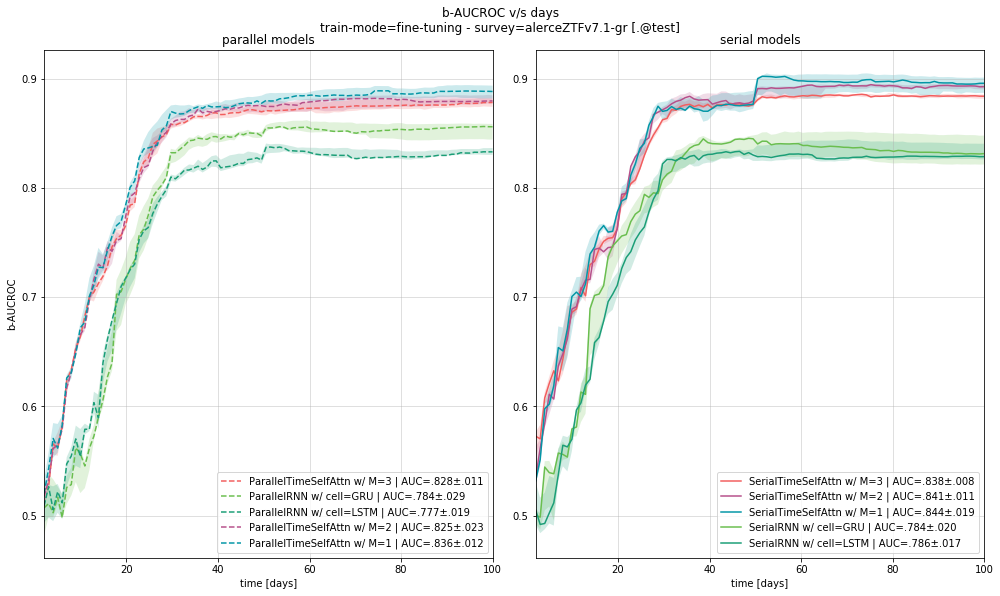

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lcclassifier.results.plots import plot_metric

lcset_name = 'test'
label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
    'bypass',
    'b',
]
dmetrics = {
    #f'b-precision':{'k':1, 'mn':None},
    #f'b-recall':{'k':1, 'mn':None},
    #f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'label_keys':label_keys,
    #'baselines_dict':baselines_dict,
    'p':40,
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)

In [4]:
assert 0

AssertionError: 

In [15]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_parallel_serial_df
from flamingchoripan.latex.latex_tables import LatexTable

dmetrics = {
    f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'uses_avg':1,
    'day':100,
    #'override_model_name':False, # False True
    'label_keys':label_keys,
    'baseline_filedir':f'../temp/baseline~mode=all.df',
    }
info_df = get_parallel_serial_df(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)
display(info_df())

caption = ''
caption += f'Baseline method v/s deep learning models.'
latex_kwargs = {
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,b-precision,b-recall,b-f1score,b-AUCROC
model=b-RF w/ FATS,"-9,999.000±.0","-9,999.000±.0","-9,999.000±.0","-9,999.000±.0"
model=ParallelRNN w/ cell***GRU,.467±.016,.582±.034,.441±.023,.785±.030
model=ParallelRNN w/ cell***LSTM,.456±.015,.584±.024,.424±.019,.777±.019
model=ParallelTimeSelfAttn w/ M***1,.497±.011,.639±.023,.474±.024,.837±.012
model=ParallelTimeSelfAttn w/ M***2,.488±.022,.619±.038,.453±.050,.826±.023
model=ParallelTimeSelfAttn w/ M***3,.498±.011,.632±.025,.482±.018,.829±.011
model=SerialRNN w/ cell***GRU,.452±.020,.605±.029,.422±.029,.785±.020
model=SerialRNN w/ cell***LSTM,.448±.013,.598±.026,.410±.025,.786±.017
model=SerialTimeSelfAttn w/ M***1,.516±.022,.641±.032,.482±.020,.845±.019
model=SerialTimeSelfAttn w/ M***2,.502±.021,.635±.016,.476±.026,.842±.011


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{Baseline method v/s deep learning models.}
\label{?}\vspace{.1cm}
\begin{tabular}{l|cccc}
\hline
model & b-precision & b-recall & b-f1score & b-AUCROC \srule\\\hline\hline
b-RF w/ FATS & -9,999.000$\pm$.0 & -9,999.000$\pm$.0 & -9,999.000$\pm$.0 & -9,999.000$\pm$.0  \srule\\
ParallelRNN w/ cell***GRU & .467$\pm$.016 & .582$\pm$.034 & .441$\pm$.023 & .785$\pm$.030  \srule\\
ParallelRNN w/ cell***LSTM & .456$\pm$.015 & .584$\pm$.024 & .424$\pm$.019 & .777$\pm$.019  \srule\\
ParallelTimeSelfAttn w/ M***1 & .497$\pm$.011 & .639$\pm$.023 & .474$\pm$.024 & .837$\pm$.012  \srule\\
ParallelTimeSelfAttn w/ M***2 & .488$\pm$.022 & .619$\pm$.038 & .453$\pm$.050 & .826$\pm$.023  \srule\\
ParallelTimeSelfAttn w/ M***3 & .498$\pm$.011 & .632$\pm$.025 & \textbf{.482$\pm$.018} & .829$\pm$.011  \srule\\
SerialRNN w/ cell*

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


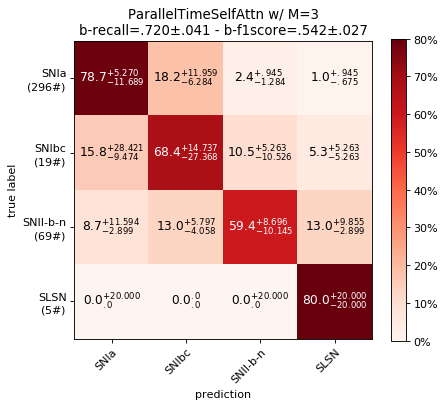

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~cell=GRU~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


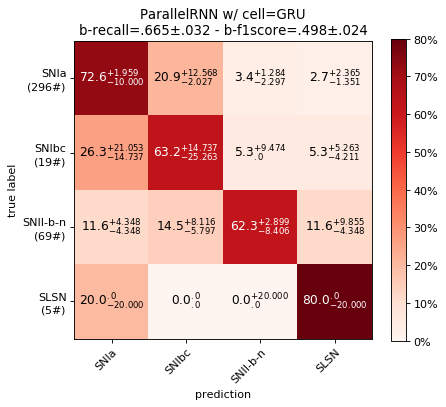

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=SerialTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=32-32-32~dec-emb=32-32-32~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


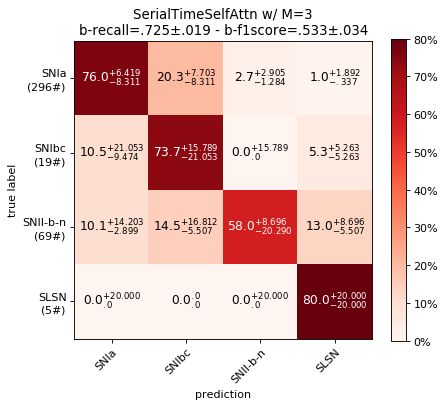

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=SerialTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=32-32-32~dec-emb=32-32-32~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


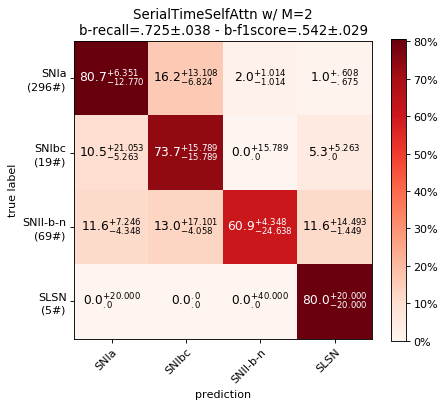

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~cell=LSTM~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


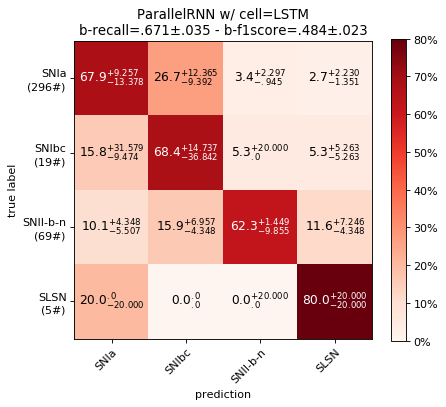

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=4~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


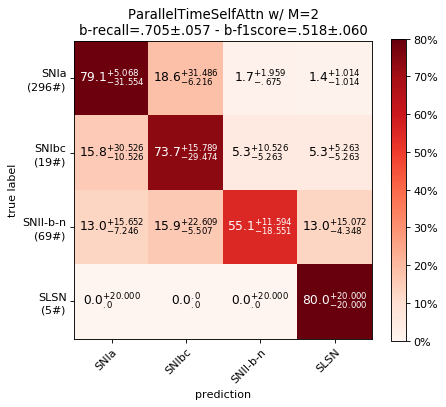

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=SerialTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=32-32-32~dec-emb=32-32-32~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


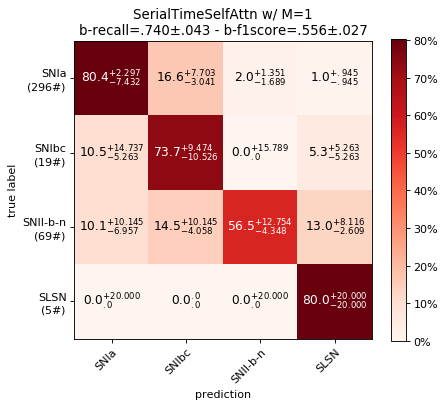

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32-g32.r32-r32-r32~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


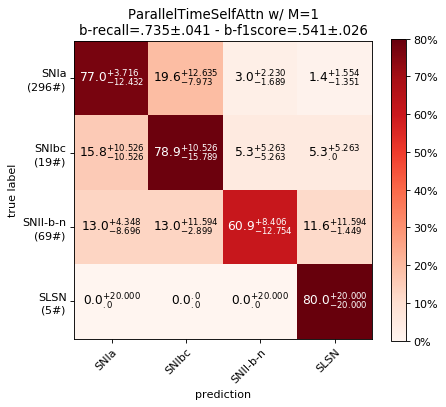

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=SerialRNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=32-32-32~cell=GRU~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


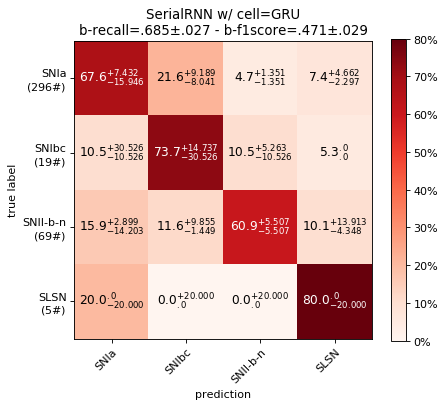

ids=['0@id=1000', '0@id=1001', '0@id=1002', '0@id=1003', '0@id=1004', '1@id=1000', '1@id=1001', '1@id=1002', '1@id=1003', '1@id=1004', '2@id=1000', '2@id=1001', '2@id=1002', '2@id=1003', '2@id=1004', '3@id=1000', '3@id=1001', '3@id=1002', '3@id=1003', '3@id=1004', '4@id=1000', '4@id=1001', '4@id=1002', '4@id=1003', '4@id=1004'](n=25#) - model=mdl=SerialRNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=32-32-32~cell=LSTM~b=516~rsc=0~bypass=0
100%|██████████, 100.0/100.0 [days]


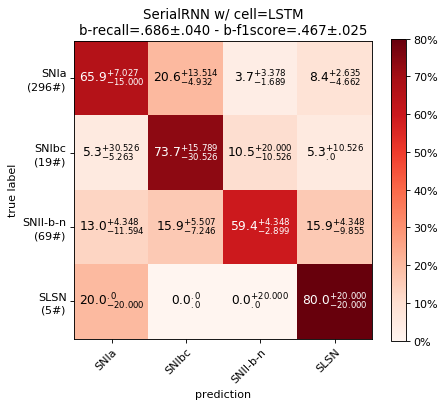

In [29]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

label_keys = [
    'cell',
    'aggr',
    'te-dims',
]
lcset_name = 'test'
kwargs = {
    'label_keys':label_keys,
    'export_animation':False, # False True
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_temporal_encoding

label_keys = [
    'cell',
    'aggr',
    'te-dims',
]
lcset_name = f'train.{method}'
kwargs = {
    'label_keys':label_keys,
}
plot_temporal_encoding(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.times import get_times_df

kwargs = {
    #'override_model_name':False, # False True
    'label_keys':label_keys,
    }
info_df = get_times_df(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)
info_df